# Data Visualization of Covid-19 using Python

In this project, I am doing a quick analysis of novel coronavirus SARS-CoV2. I will be using datasets provided by JHU which is updating their datasets everyday since the start of pandemic. I am going to use pandas and matplotlib libraries of python for this project. 

In [114]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.dates as matDates
#using inline command so that the graphs are included in the notebook
%matplotlib inline
plot.style.use('bmh')

In [115]:
#extracting information from JHU datasets
df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv',parse_dates=['Date'])
df['Total Cases']=df[['Confirmed','Recovered','Deaths']].sum(axis=1)

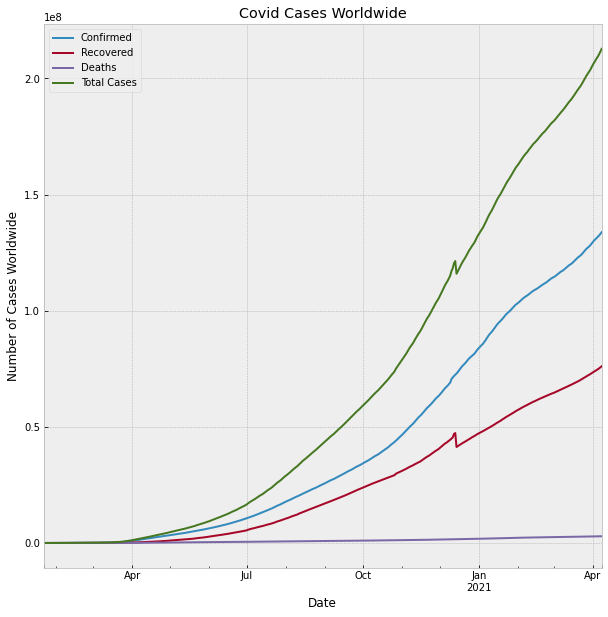

In [116]:
world_df=df.groupby(['Date']).sum()
worldPlot=world_df.plot(figsize=(10,10))
worldPlot.title.set_text("Covid Cases Worldwide")
worldPlot.set_ylabel("Number of Cases Worldwide")
worldPlot.set_xlabel("Date")
plot.show()


This plot displays all the cases, all around the world, that have been recorded so far. The plot shows all the total cases including the confirmed cases, recovered cases and number of deaths that have happened so far.

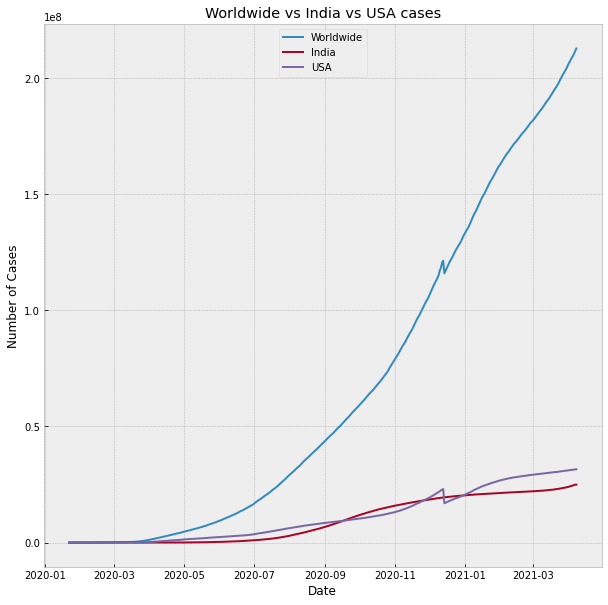

In [117]:
ind_df=df[df['Country']=='India'].groupby(['Date']).sum()
usa_df=df[df['Country']=='US'].groupby(['Date']).sum()
mainPlot=plot.figure(figsize=(10,10))
sub=mainPlot.add_subplot(111)
sub.plot(world_df[['Total Cases']],label='Worldwide')
sub.plot(ind_df[['Total Cases']],label='India')
sub.plot(usa_df[['Total Cases']],label='USA')
sub.set_ylabel('Number of Cases')
sub.set_xlabel('Date')
sub.title.set_text('Worldwide vs India vs USA cases')
plot.legend(loc='upper center')
plot.show()

Here, I have done quick analysis between the number of cases in USA and India. 

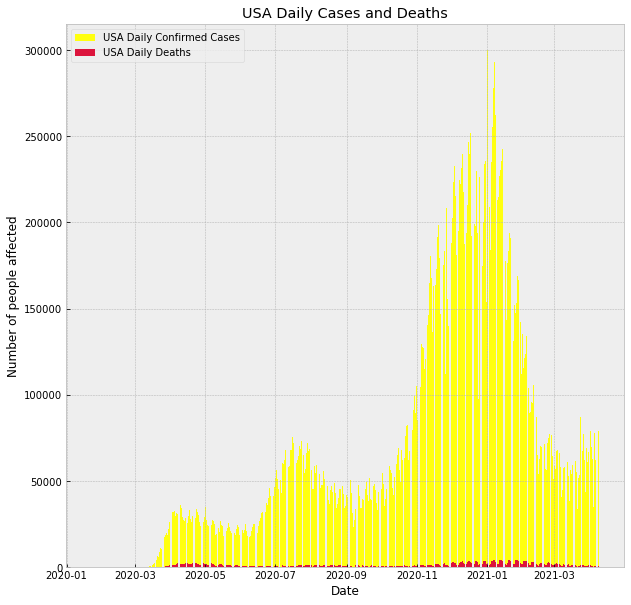

In [118]:
usa_df=usa_df.reset_index()
usa_df['Daily Confirmed']=usa_df['Confirmed'].sub(usa_df['Confirmed'].shift())
usa_df['Daily Deaths']=usa_df['Deaths'].sub(usa_df['Deaths'].shift())
#usa_df.head()
mainPlot=plot.figure(figsize=(10,10))
sub=mainPlot.add_subplot(111)
sub.bar(usa_df['Date'],usa_df['Daily Confirmed'],color='#FFFF10',label='USA Daily Confirmed Cases')
sub.bar(usa_df['Date'],usa_df['Daily Deaths'],color='#DC143C',label='USA Daily Deaths')
sub.set_ylabel("Number of people affected")
sub.set_xlabel("Date")
sub.title.set_text('USA Daily Cases and Deaths')
plot.legend(loc='upper left')
plot.show()

In this bar graph we can visualize how many deaths happens in comparison with the daily number of confirmed cases. This graph is specific to the cases in USA. As of now (mid-April,2021) we can see that  peak of curve happended in January 2021.

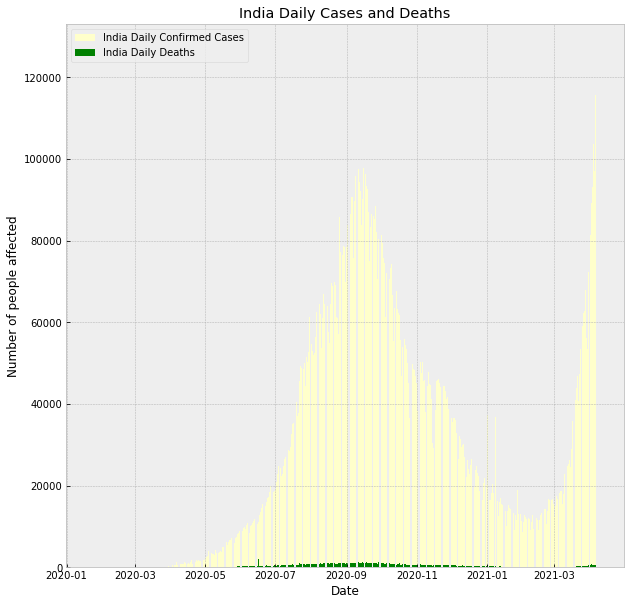

In [119]:
ind_df=ind_df.reset_index()
ind_df['Daily Confirmed']=ind_df['Confirmed'].sub(ind_df['Confirmed'].shift())
ind_df['Daily Deaths']=ind_df['Deaths'].sub(ind_df['Deaths'].shift())
#usa_df.head()
mainPlot=plot.figure(figsize=(10,10))
sub=mainPlot.add_subplot(111)
sub.bar(ind_df['Date'],ind_df['Daily Confirmed'],color='#FFFFCB',label='India Daily Confirmed Cases')
sub.bar(ind_df['Date'],ind_df['Daily Deaths'],color='#008000',label='India Daily Deaths')
sub.set_ylabel("Number of people affected")
sub.set_xlabel("Date")
sub.title.set_text('India Daily Cases and Deaths')
plot.legend(loc='upper left')
plot.show()

This is similar to bargraph as we have seen above. This one compares the number of confirmed cases and number of deaths in India. In this graph, we can see that there are two waves that have happened so far and the peak of the curve is still not known.

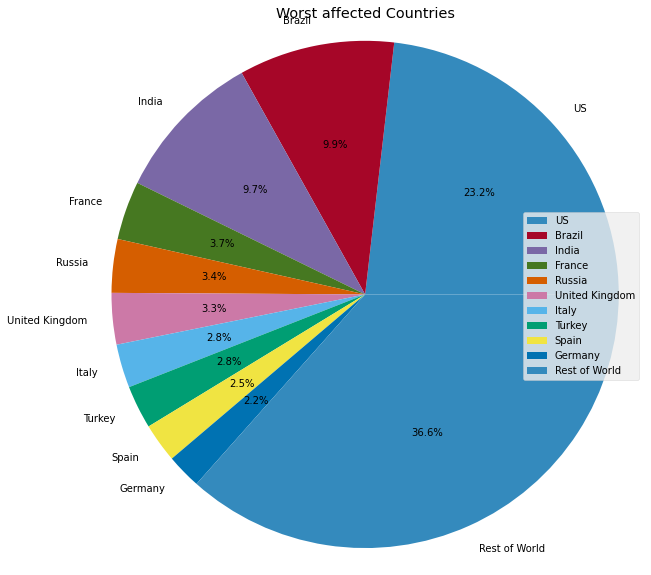

In [120]:
from datetime import date, timedelta
yesterday=date.today()-timedelta(days=1)
yesterday=yesterday.strftime('%Y-%m-%d')

today_df=df[df['Date']==yesterday]
top_10=today_df.sort_values(['Confirmed'],ascending=False)[:10]
top_10.loc['Rest of the world']=today_df.sort_values(['Confirmed'],ascending=False)[10:].sum()
top_10.loc['Rest of the world','Country']= 'Rest of World'

mainPlot=plot.figure(figsize=(10,10))
sub=mainPlot.add_subplot(111)
sub.pie(top_10['Confirmed'],labels=top_10['Country'],autopct='%1.1f%%')
sub.axis('equal')
sub.title.set_text('Worst affected Countries')
plot.legend(loc='right')
plot.show()

This pie chart is to compare the number of cases in the top 10 worst affected countries all around the globe.


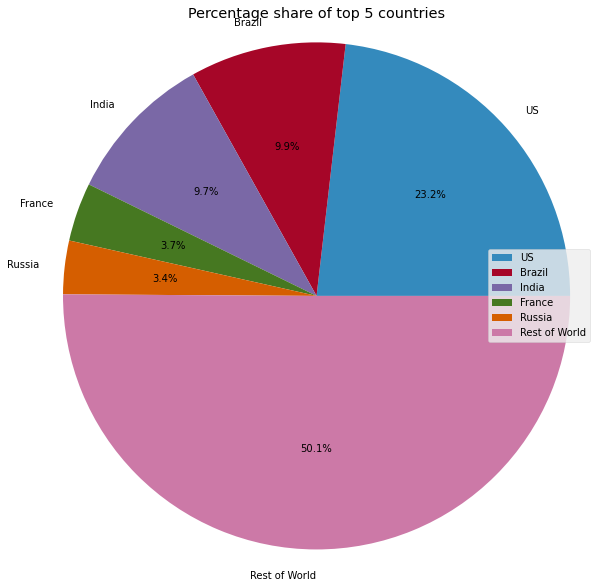

In [122]:

top_5=today_df.sort_values(['Confirmed'],ascending=False)[:5]
top_5.loc['Rest of the world']=today_df.sort_values(['Confirmed'],ascending=False)[5:].sum()
top_5.loc['Rest of the world','Country']= 'Rest of World'

mainPlot=plot.figure(figsize=(10,10))
sub=mainPlot.add_subplot(111)
sub.pie(top_5['Confirmed'],labels=top_5['Country'],autopct='%1.1f%%')
sub.axis('equal')
sub.title.set_text('Percentage share of top 5 countries')
plot.legend(loc='right')
plot.show()

It is also very interesting to see that the top 5 worst affected countries account for almost 50% of all the cases that have been recorded yet.